In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('events.csv',low_memory = False)
df.tail()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,8512.0,Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df.info()
df.isnull().sum()
#df['timestamp'].size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 24 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region            

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
month                             0
dtype: int64

In [82]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
#dff = df.loc[df['month'] == 6, ['timestamp'] ]
#dff.sort_values('timestamp', ascending= False)
#En el mes 6 hay datos solo hasta el día 15

In [4]:
#Me limito a hacer un analisis solo con meses porque hay un solo año
months_visits = df[(df['event'] == 'visited site') | (df['event'] == 'ad campaign hit') | (df['event'] == 'search engine hit')]
months_visits = months_visits['month'].value_counts().to_frame()
months_visits = months_visits.sort_index(ascending= False)
months_visits

,month
6,60765
5,102504
4,29179
3,17406
2,6468
1,4840


Text(0,0.5,'Cantidad de visitas')

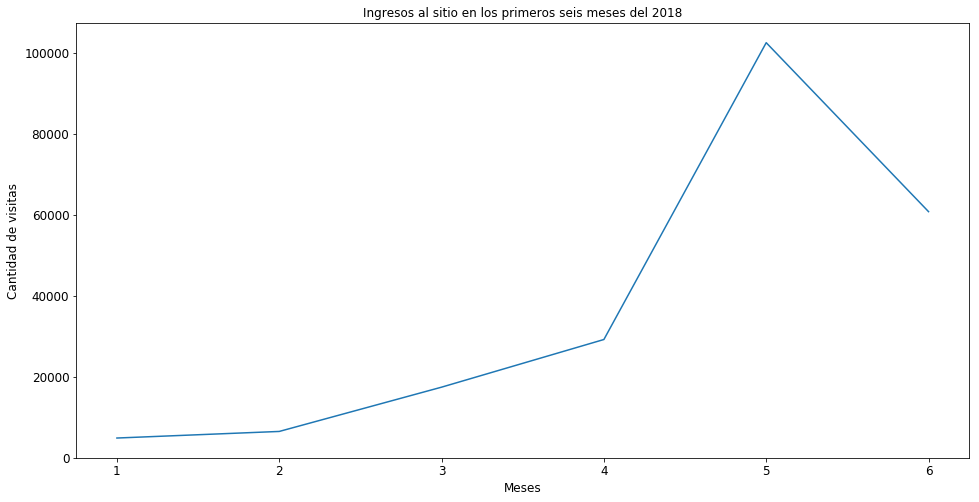

In [5]:
months_visits.plot(kind = 'line', figsize = (16, 8), title = 'Ingresos al sitio en los primeros seis meses del 2018', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Cantidad de visitas", fontsize = 12)

In [6]:
viewed = df[(df['event'] == 'viewed product')]
viewed = viewed['month'].value_counts()
viewed = viewed.sort_index(ascending = False)
viewed

6    147028
5    253312
4     65944
3     39666
2     14130
1      8851
Name: month, dtype: int64

Text(0,0.5,'Cantidad de visitas')

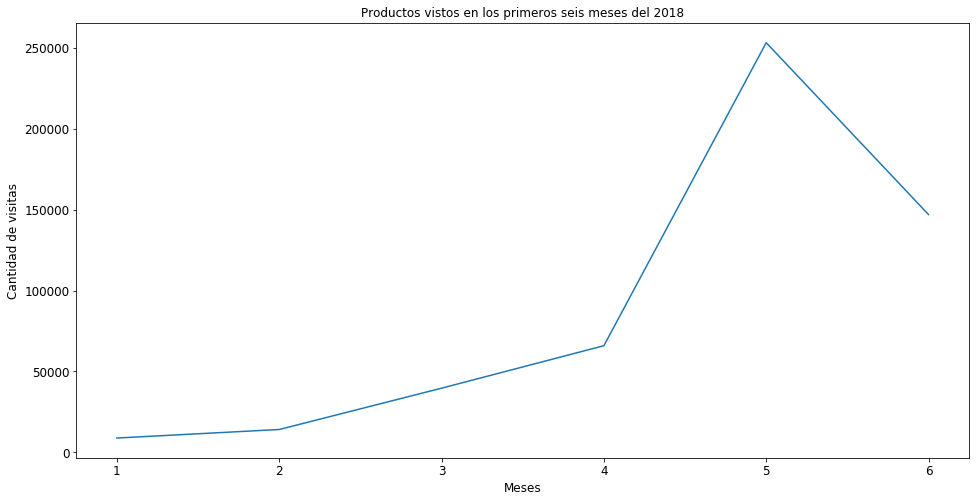

In [36]:
viewed.plot(kind = 'line', figsize = (16, 8), title = 'Productos vistos en los primeros seis meses del 2018', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Cantidad de visitas", fontsize = 12)

In [151]:
sales = df.loc[ (df['event'] == 'conversion'), ['event', 'month']]
sales = sales.groupby('month').size().sort_index(ascending = False).rename('Compras')
sales

month
6    103
5    351
4    316
3    265
2     74
1     63
Name: Compras, dtype: int64

In [134]:
ch_vs_co = df.loc[(df['event'] == 'checkout') | (df['event'] == 'conversion'), ['event']]
ch_vs_co = ch_vs_co['event'].value_counts().to_frame()
ch_vs_co

,event
checkout,33735
conversion,1172


Text(0,0.5,'Frecuencia')

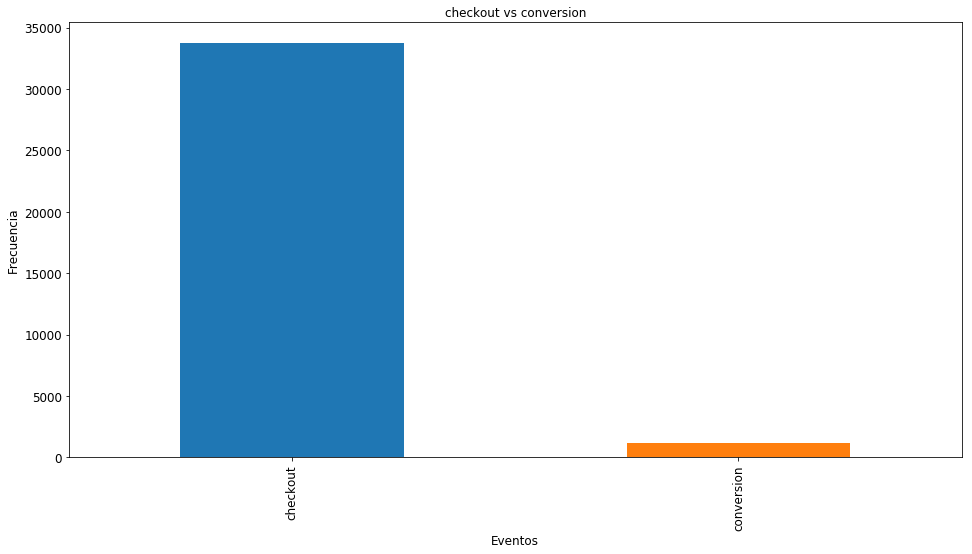

In [67]:
ch_vs_co.plot(kind = 'bar', figsize = (16, 8), title = 'checkout vs conversion', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Eventos",fontsize = 12)
ax.set_ylabel("Frecuencia", fontsize = 12)

In [154]:
checkout = df.loc[(df['event'] == 'checkout'), ['event', 'month']]
checkout = checkout.groupby('month').size().sort_index(ascending = False).rename('Checkout')
checkout

month
6    13967
5    15645
4     1965
3     1386
2      441
1      331
Name: Checkout, dtype: int64

Text(0,0.5,'Ventas')

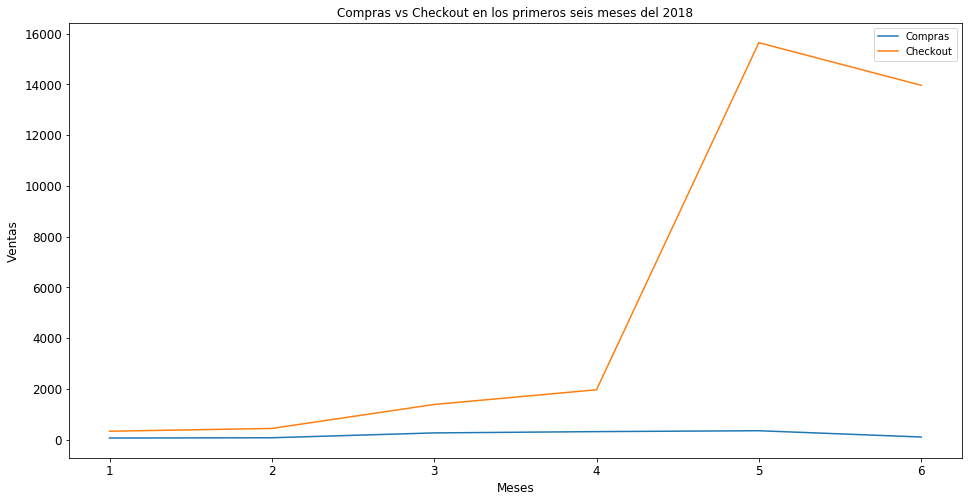

In [156]:
sales.plot(kind = 'line', figsize = (16, 8), title = 'Compras vs Checkout en los primeros seis meses del 2018', legend = True, fontsize = 12)
checkout.plot(kind = 'line', figsize = (16, 8), title = 'Compras vs Checkout en los primeros seis meses del 2018', legend = True, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Ventas", fontsize = 12)

Text(0,0.5,'Ventas')

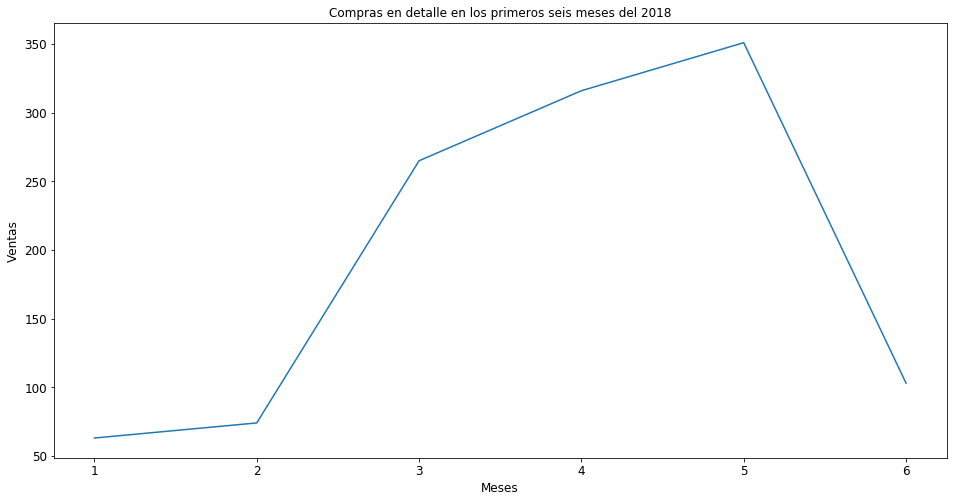

In [157]:
sales.plot(kind = 'line', figsize = (16, 8), title = 'Compras en detalle en los primeros seis meses del 2018', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Ventas", fontsize = 12)

In [113]:
df.groupby('new_vs_returning')['event'].value_counts()

new_vs_returning  event       
New               visited site    26898
Returning         visited site    60480
Name: event, dtype: int64

In [126]:
new_users = df[ (df['new_vs_returning'] == 'New')].drop_duplicates('person')
new_users = new_users['month'].value_counts().sort_index(ascending = False)
new_users.rename('Nuevos usuarios', inplace = True)

6    10526
5    12604
4     1627
3     1125
2      499
1      517
Name: Nuevos usuarios, dtype: int64

In [124]:
ret_users = df[ (df['new_vs_returning'] == 'Returning')].drop_duplicates('person')
ret_users = ret_users['month'].value_counts().sort_index(ascending = False)
ret_users.rename('Usuarios que regresan', inplace = True)

6    3421
5    5113
4    1173
3     819
2     327
1     278
Name: Usuarios que regresan, dtype: int64

Text(0,0.5,'Usuarios')

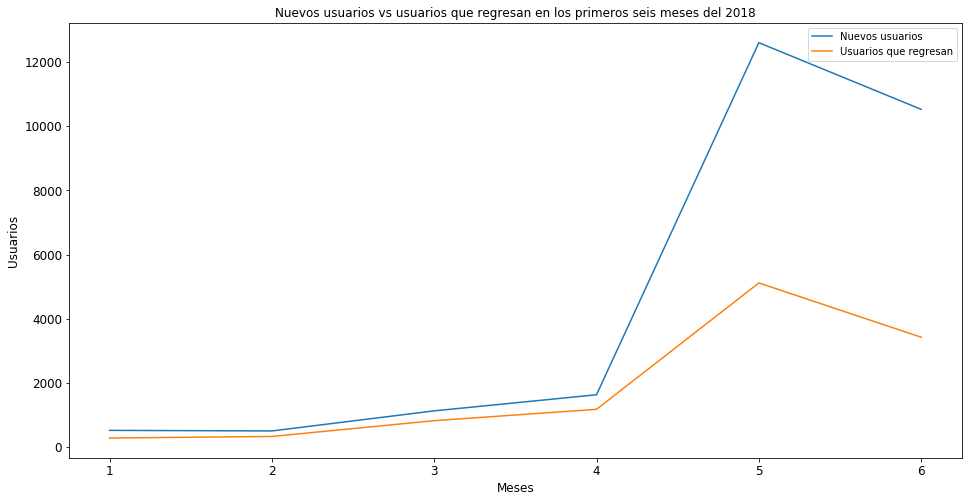

In [127]:
new_users.plot(kind = 'line', figsize = (16, 8), title = 'Nuevos usuarios vs usuarios que regresan en los primeros seis meses del 2018', legend = True, fontsize = 12)
ret_users.plot(kind = 'line', figsize = (16, 8), title = 'Nuevos usuarios vs usuarios que regresan en los primeros seis meses del 2018', legend = True, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Usuarios", fontsize = 12)